['setosa', 'versicolor', 'virginica']


c:\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


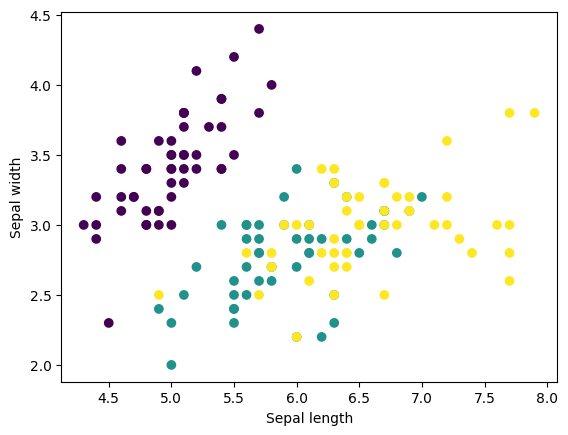

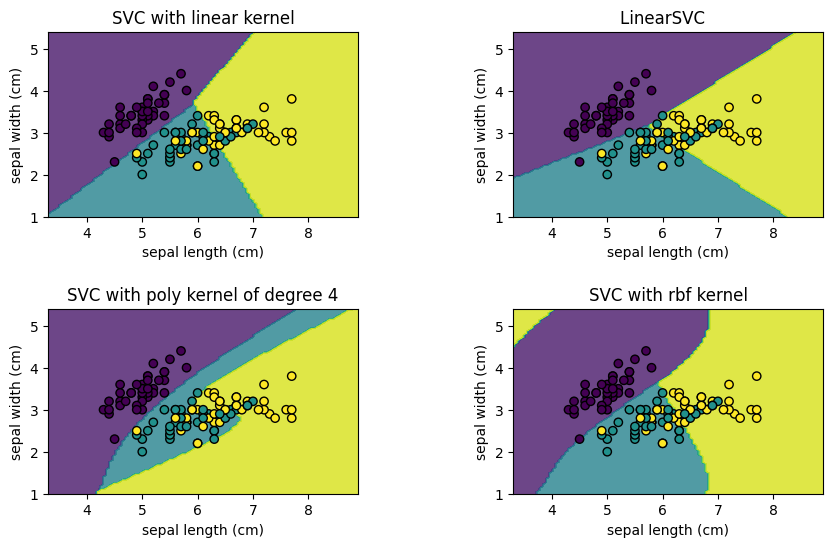

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0]), array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0]), array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 2, 2, 2, 2, 0, 0]), array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.8)

shape = X.shape
# print("x: ",shape)
# print("y",y)
print(list(iris.target_names))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y,)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
C = 1.0
degree = 4
models = (
    svm.SVC(kernel = "linear",C = C),
    svm.LinearSVC(C = C),
    svm.SVC(kernel= "poly",degree = degree,gamma = 1, C = C),
    svm.SVC(kernel = "rbf", gamma = 0.7, C = C),
)

models = (clf.fit(X_train,y_train) for clf in models)

titles = (
    "SVC with linear kernel",
    "LinearSVC  ",
    f"SVC with poly kernel of degree {degree}",
    "SVC with rbf kernel"
)

fig, sub = plt.subplots(2,2, figsize = (10,6))
plt.subplots_adjust(hspace=0.5,wspace=0.5)



X0,X1 = X_train[:,0],X_train[:,1]
prediction_models = []
for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        estimator = clf,
        X = X,
        response_method="predict",
        # cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y_train,   edgecolors="k")
    # ax.set_xticks(())
    # ax.set_yticks(())
    ax.set_title(title)
    prediction_models.append(clf.fit(X_train, y_train).predict(X_test))

plt.show()

print(y_train)
print(y_test)
print(prediction_models)



[[10  0  0]
 [ 0  2  1]
 [ 0  3  8]]


,Class,Precision,Recall,F1-Score,Accuracy
0,0.0,1.0,1.0,1.0,1.0


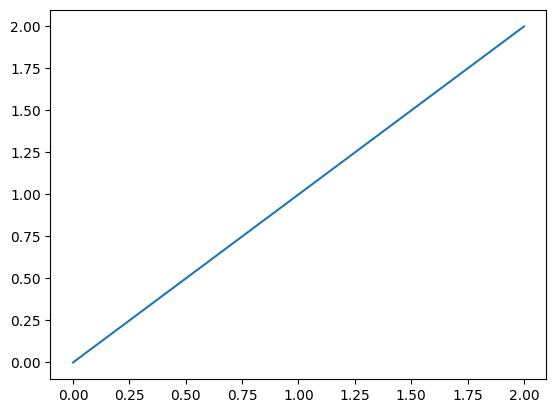

,Class,Precision,Recall,F1-Score,Accuracy
0,1.0,0.615385,0.4,0.484848,0.822917


,Class,Precision,Recall,F1-Score,Accuracy
0,2.0,0.72093,0.861111,0.78481,0.822917


In [7]:
class ConfusionMatrix:
    def __init__(self,y_train, y_test,prediction_models,training_models):
        self.y_train = y_train
        self.y_test = y_test
        self.prediction_models = prediction_models
        self.training_models = training_models
        self.matrix = []

    def Matrix_contruction(self):
        
        self.tp00,self.tn01,self.tn02 = 0,0,0
        self.tn10,self.tp11,self.tn12 = 0,0,0
        self.tn20,self.tn21,self.tp22 = 0,0,0
        for y_pred in prediction_models:
            for i in range(len(y_pred)):
                
                if y_pred[i] == y_test[i]==0:
                    self.tp00+=1
                elif y_pred[i] ==0 and y_train[i]== 1:
                    self.tn01+=1
                elif y_pred[i] ==0 and y_test[i] == 2:
                    self.tn02+=1

                elif y_pred[i] ==1 and y_test[i] ==0 :
                    self.tn10+=1
                elif y_pred[i] ==1 and y_train[i]== 1:
                    self.tp11+=1
                elif y_pred[i] ==1 and y_test[i] == 2:
                    self.tn12+=1
                
                elif y_pred[i] ==2 and y_test[i]==0:
                    self.tn20+=1
                elif y_pred[i] ==2 and y_train[i]== 1:
                    self.tn21+=1
                elif y_pred[i] ==2 and y_test[i] == 2:
                    self.tp22+=1

            self.matrix.append(np.array([np.array([self.tp00,self.tn01,self.tn02]), np.array([self.tn10,self.tp11,self.tn12]), np.array([self.tn20,self.tn21,self.tp22])]))
        return self.matrix
        
    # def Matrix_plot(self):
    #     linearsvm_matrix = self.matrix[0]
    #     fig, sub = plt.subplots(3,3, figsize = (4,4))
    #     # plt.axis("off")
    #     plt.subplots_adjust(hspace=0,wspace=0)
    #     x = np.arange(0,3,1)
    #     y = np.arange(0,3,1)
    #     # for i in (self.matrix):
    #     print(len(sub.flatten()))
    #     # for j,ax in zip(self.matrix[0],sub.flatten()):
    #     for j in linearsvm_matrix:
    #             # print(j)

    #             for k,ax in zip(j,sub.flatten()):
    #             # for k in j:
    #                 print(j)
    #                 x = np.arange(0,1,0.001)
    #                 y=1
    #                 if k > 0:
    #                     ax.plot()
    #                     ax.fill_between(x,y,color = "g")
    #                     ax.axis("off")
    #                     print(k)
    #                 elif k == 0:
    #                     ax.fill_between(x,y,color = "r")
    #                     ax.axis("off")
    #                     print(k)
    #                 # ax.colorbar()

    def Matrix_plot(self):
        linearsvm_matrix = self.matrix[0]
        x = np.arange(0,3,1)
        y = np.arange(0,3,1)
        plt.plot(x,y)
        for i in x:
            for j in y:
                plt.plot(i,j)


    def Scores(self,y):
        score = pd.DataFrame(columns=["Class", "Precision","Recall","F1-Score","Accuracy"])
        # display(score)
        
        if y ==0 : 
            tp = self.tp00
            tn = self.tp11 + self.tn12 + self.tn21 + self.tp22
            fn = self.tn10 + self.tn20
            fp = self.tn01 + self.tn02
            precision = tp/(tp+fp)
            recall = tp/(tp+fn)
            f1 = 2*precision*recall/(precision + recall)
            accuracy = (tp+tn)/(tp+tn+fp+fn)
            score.loc[len(score.index)] = [y,precision,recall,f1,accuracy]
            # display(score)
        
        elif y ==1 :
            tp = self.tp11
            tn = self.tp00 + self.tn02 + self.tn20 + self.tp22
            fn = self.tn01 + self.tn21
            fp = self.tn10 + self.tn12
            precision = tp/(tp+fp)
            recall = tp/(tp+fn)
            f1 = 2*precision*recall/(precision + recall)
            accuracy = (tp+tn)/(tp+tn+fp+fn)
            score.loc[len(score.index)] = [y,precision,recall,f1,accuracy]
            # display(score)
        
        elif y==2 : 
            tp = self.tp22
            tn = self.tp00 + self.tn01 + self.tn10 + self.tp11
            fn = self.tn02 + self.tn12
            fp = self.tn20 + self.tn21
            precision = tp/(tp+fp)
            recall = tp/(tp+fn)
            f1 = 2*precision*recall/(precision + recall)
            accuracy = (tp+tn)/(tp+tn+fp+fn)
            score.loc[len(score.index)] = [y,precision,recall,f1,accuracy]
            
        display(score)


                
        
        # for ax in sub.flatten():
        #     ax.fill(1,1,color = "green")
            
        plt.show()
    

    
    

a = ConfusionMatrix(y_train, y_test,prediction_models,models)
confusion_matrix = a.Matrix_contruction()
print(confusion_matrix[0])
a.Matrix_plot()

a.Scores(0)
a.Scores(1)
a.Scores(2)





[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0]
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


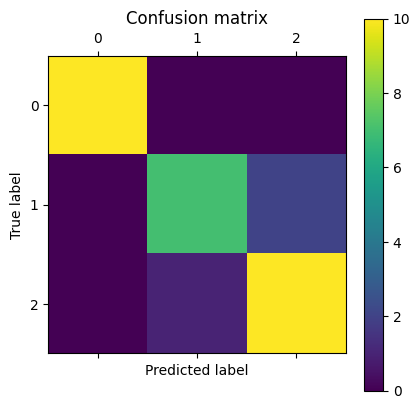

In [4]:

# from sklearn.metrics import confusion_matrix

# import matplotlib.pyplot as plt

# # # Run classifier
# classifier = svm.SVC(kernel='linear', C =1)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)
# print(y_pred)
# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# print(cm)

# # Show confusion matrix in a separate window
# plt.matshow(cm)
# plt.title('Confusion matrix')
# plt.colorbar()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()